# Lecture 15 - Add Knowledge to Language Models

provided by [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-What-does-a-LM-know?">What does a LM know?</a></li>
    <li>3. <a href="#3.-Techniques-to-Add-Knowledge-to-LMs">Techniques to Add Knowledge to LMs</a></li>
    <li>4. <a href="#4.-Evaluating-Knowledge-in-LMs">Evaluating Knowledge in LMs</a></li>
    <li>5. <a href="#5.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

# 2. What does a LM know?

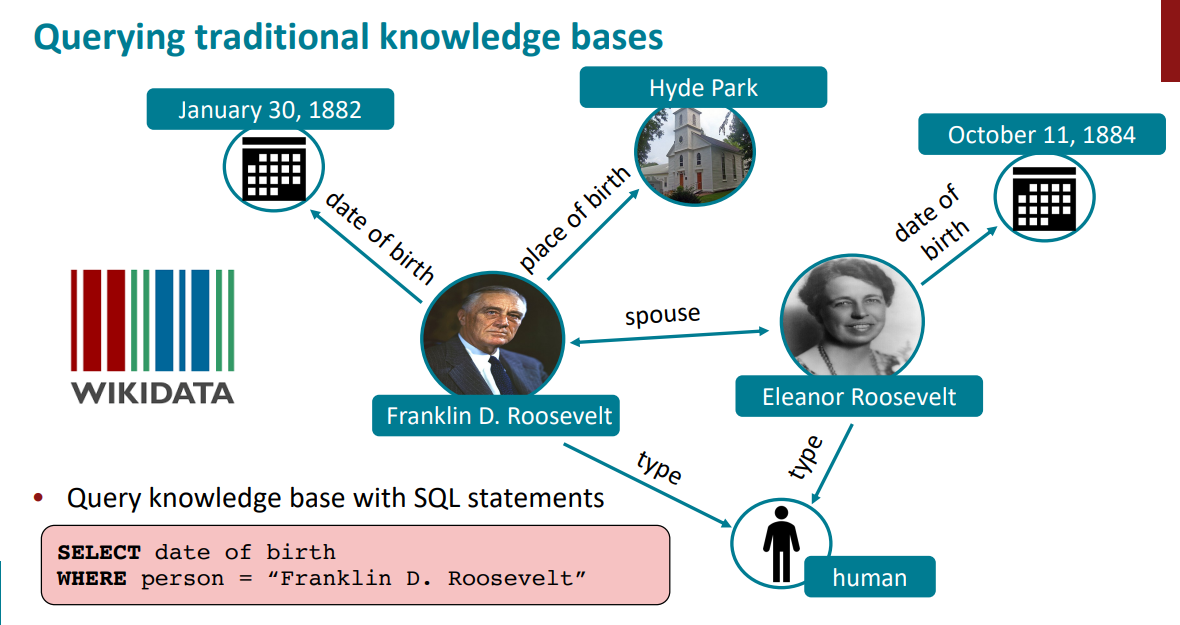 <br>
_Figure 1. Knowledge graph._

Predictions that require knowledge may make sense but can sometimes be factually incorrect. This can be due to the following:
* unseen facts
* rare facts
* model sensitivity (model has to be correctly prompted to generate desired answer)

This lecture focuses on how to reliably have models recall knowledge. An LM with pretrained knowledge can benefit downstream tasks like entity recognition. In a larger sense, LMs can ultimately serve as knowledge databases like a table (a traditional __knowledge base__).

An LM can be more flexible and dynamic than a static knowledge base. However, LMs are prone to bias, hard to understand, trust, and modify.

# 3. Techniques to Add Knowledge to LMs

There are 3 main methods to add knowledge to LMs:
* add pretrained entity embeddings
    * ERNIE
    * KnowBERT
* use an external memory (external knowledge base)
    * KGLM
    * kNN-LM
* modify the training data
    * WKLM
    * ERNIE, salient span masking

The first method, __adding pretrained entity embeddings__, is exactly as the method describes. This method is broken down into 2 steps:
* entity embeddings
* entity linking

Each entity should have an embedding and different words should be mapped to the same/similar embedding (via __entity linking__).

__Enhanced Language Representation with Information Entities (ERNIE)__ uses a multi-layer bidirectional Transformer encoder along with a __knowledge encoder__ that is composed of 2 multi-headed attention layers and a __fusion layer__ (which combines the outputs from both the __text encoder__ and knowledge encoder).

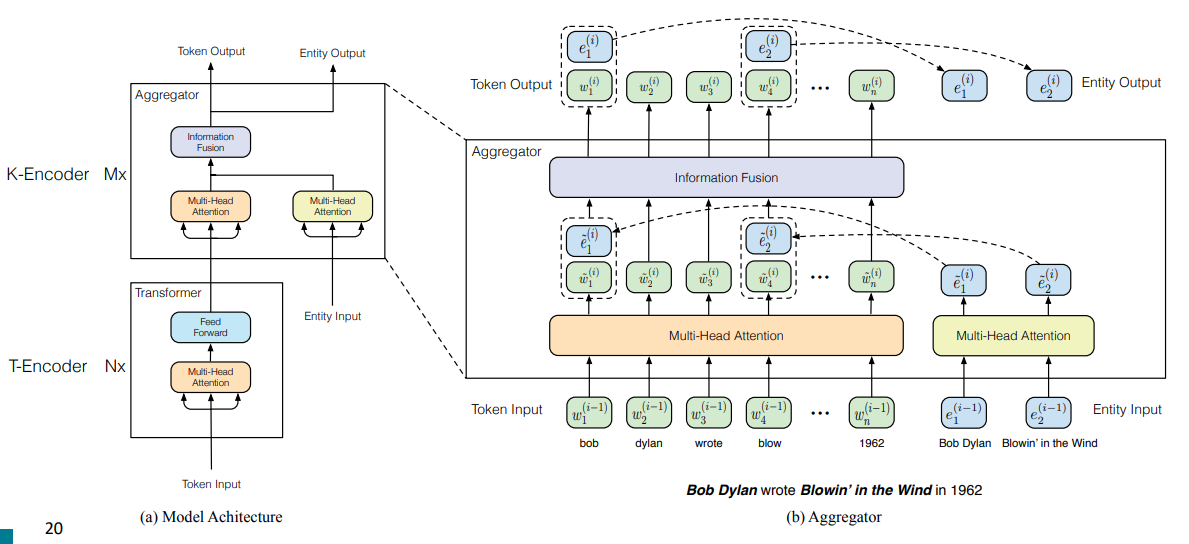 <br>
_Figure 2. ERNIE._

ERNIE is trained on a total of 3 tasks. ERNIE is trained with next sentence prediction like in BERT and masking inputs. It is also trained on a __knowledge pretraining task__ which will mask the entity tokens in the input to the knowledge encoder.

ERNIE improves performance downstream but demands labeled entities (which is expensive and time consuming).

__KnowBERT__ pretrains an __integrated entity linker (EL)__ as an extension to BERT. From what I understand ERNIE requires entities to be _inputs_ to the model. KnowBERT builds the entity linker into BERT as an extension. Both still need entity labels, but KnowBERT doesn't need to be fed the entities directly. It will learn the linker internally.

$$
\mathcal{L} = \mathcal{L}_{NSP} + \mathcal{L}_{MLM} + \mathcal{L}_{EL}
$$



The second method, __using an external memory__, introduces an external database separate from the model parameters. This allows you to customize and inject certain pieces of knowledge. Additional pretraining is often not required and your model is more interpretable.

__Knowledge-Graphs for Language Modeling (KGLM)__ conditions the language model on a knowledge graph (KG). 

$$
P(x^{(t + 1)}~|~x^{(t)}, ..., x^{(1)})\\
P(x^{(t + 1)}, \mathcal{E}^{(t + 1)}~|~x^{(t)}, ..., x^{(1)}, \mathcal{E}^{(t)}, ..., \mathcal{E}^{(1)}) \hspace{1em} (Eq.~1)\\
$$

It can predict the next word and entity given the previous words and entities.

The next token might or might not be an entity. It is the model's job to classify whether the next token is a related entity (in the knowledge graph it has built), a new entity, or not an entity at all.

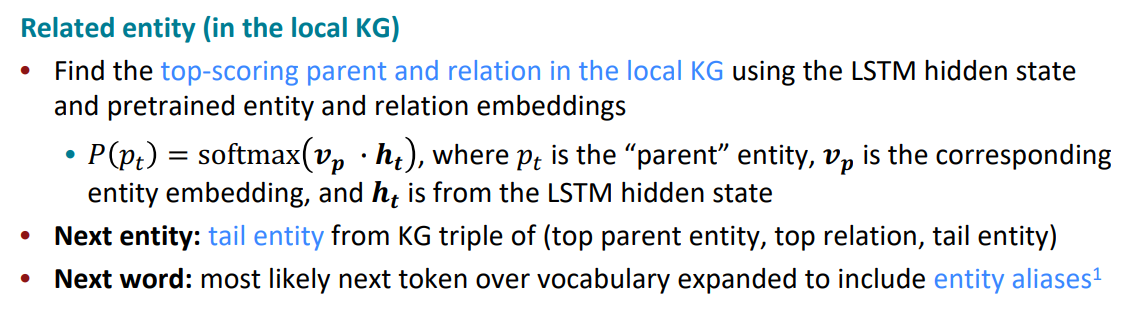 <br>
_Figure 3. KGLM Related Entity._

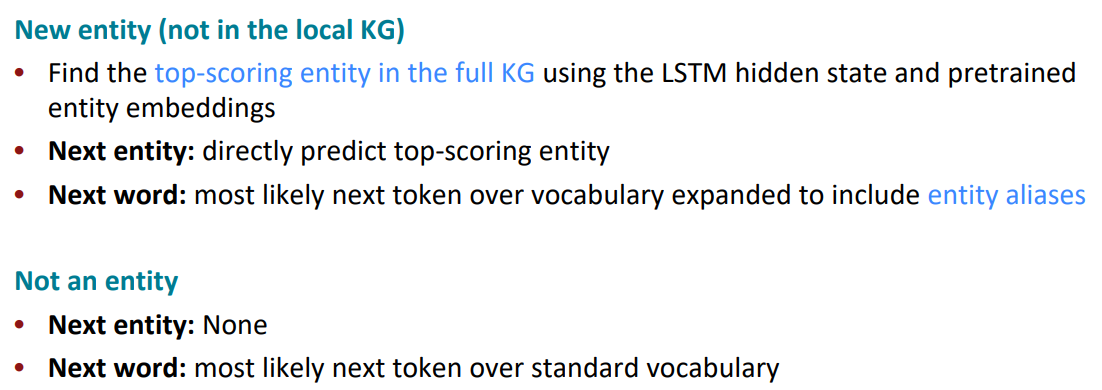 <br>
_Figure 4. KGLM New and non entities._

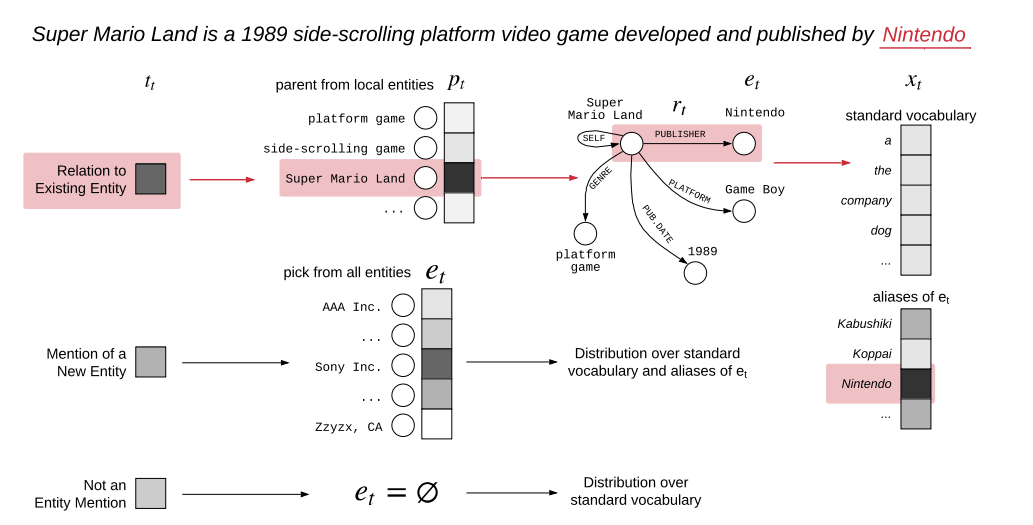 <br>
_Figure 5. KGLM Entity Classification._

KGLM beats GPT-2 on fact completion.

__Nearest Neighbor Language Models (kNN-LM)__ uses a KNN to see which entity is most likely given observations in training.

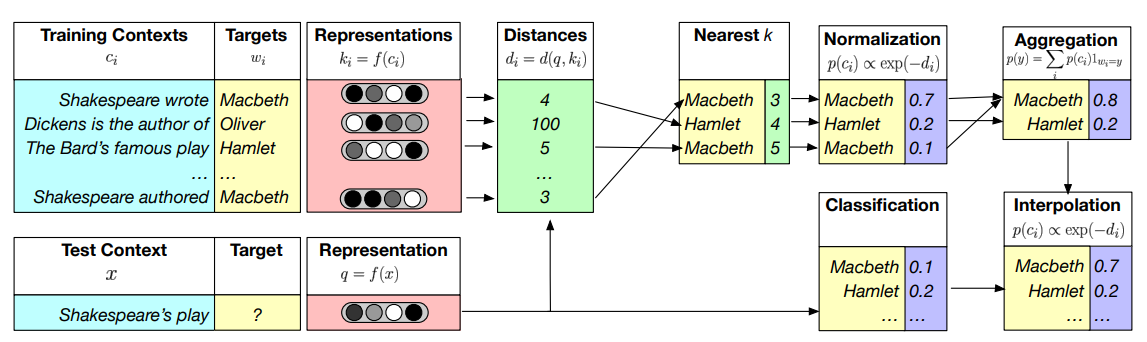 <br>
_Figure 6. kNN-LM pipeline._

The third method, __modifying training data__, focuses on tailoring the data to help the model learn knowledge.

__Weakly Supervised Knowledge-Pretrained Language Model (WKLM)__ trains the model to distinguish between true and false knowledge. The idea is to fill in mentions with the wrong entity.

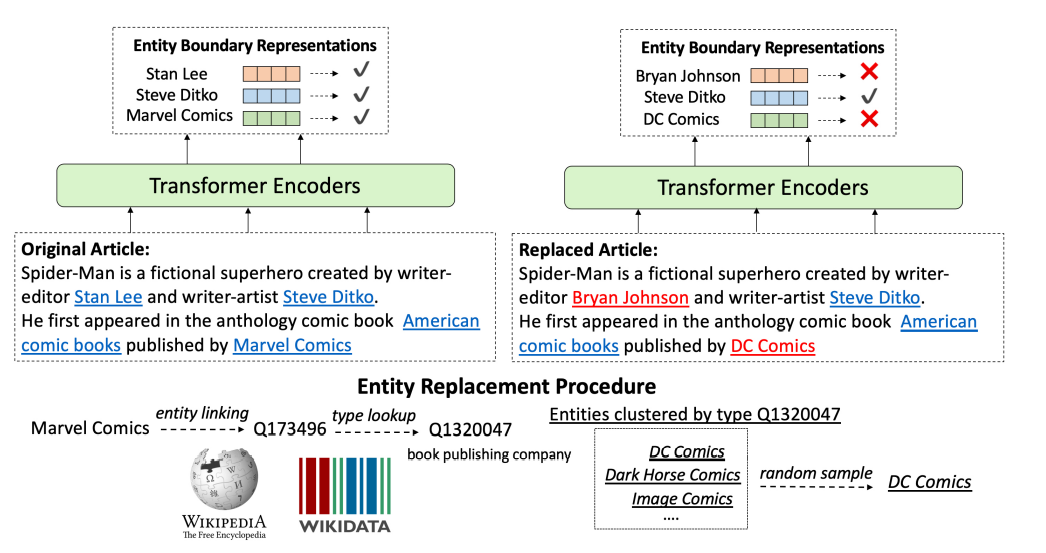 <br>
_Figure 7. WKLM._

WKLM is trained with the following modified loss:

$$
\mathcal{L}_{entRep} = \mathbb{1}_{e \in \mathcal{E}^+} log P(e~|~C) + (1 - \mathbb{1}_{e \in \mathcal{E}^+}) log(1 - P(e~|~C)) \hspace{1em} (Eq.~2)\\
\mathcal{L}_{WKLM} = \mathcal{L}_{MLM} + \mathcal{L}_{entRep} \hspace{1em} (Eq.~3)\\
$$

WKLM improves BERT and GPT-2 on fact completion tasks and beats ERNIE on downstream tasks like entity typing. 

__Salient span masking__ and entity-level masking can also help with injecting knowledge into the model.

# 4. Evaluating Knowledge in LMs

__LAnguage Model Analysis (LAMA) Probe__ is a method for evaluating LM knowledge. The process is simple. We generate a set of __cloze statements__ (a sentence with a masked token). The model's task is to predict that mask token. However, these sentences are based on common knowledge (kind of like a closed-book statement from Raffel's talk).

This metric lacks the ability to describe why the model performs well.

__LAMA-UnHelpful Names (LAMA-UHN)__ masks words that don't require knowledge to assess whether or not the model is relying on a bias to correctly fill masked knowledge tokens.

Another way to evaluate how good these Knowledge LMs are, we can evaluate how well they perform on downstream tasks.

# 5. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)
- [Course Website](http://web.stanford.edu/class/cs224n/)

This is a series of 23 lectures provided by Stanford.
